<a href="https://colab.research.google.com/github/daemonX10/Generative-Deep-Learning/blob/main/CNN_and_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 🎆 Convolutions
In this notebook, we'll walk through how convolutional filters can pick out different aspects of an image

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize


(64, 64)


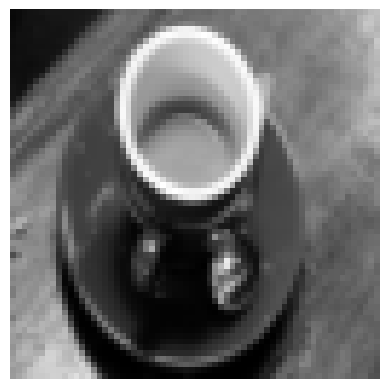

In [ ]:
im = rgb2gray(data.coffee())
im = resize(im,(64,64))
print(im.shape)
plt.axis("off")
plt.imshow(im,cmap='gray')

(64, 64, 3)


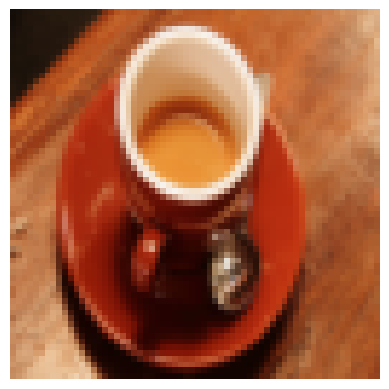

In [ ]:
im = data.coffee()
im = resize(im,(64,64))
print(im.shape)
plt.axis("off")
plt.imshow(im,cmap='gray')

In [ ]:
filter1= np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
new_image = np.zeros(im.shape)
im_pad = np.pad(im,1,'constant')

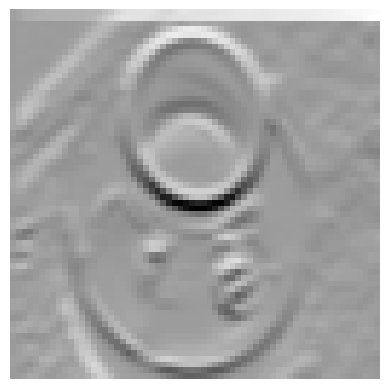

In [ ]:
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j]=(
                im_pad[i-1,j-1]*filter1[0,0]+
                im_pad[i-1,j]*filter1[0,1]+
                im_pad[i-1,j+1]*filter1[0,2]+
                im_pad[i,j-1]*filter1[1,0]+
                im_pad[i,j]*filter1[1,1]+
                im_pad[i,j+1]*filter1[1,2]+
                im_pad[i+1,j-1]*filter1[2,0]+
                im_pad[i+1,j]*filter1[2,1]+
                im_pad[i+1,j+1]*filter1[2,2]
            )
        except:
            pass
plt.axis("off")
plt.imshow(new_image,cmap='Greys')

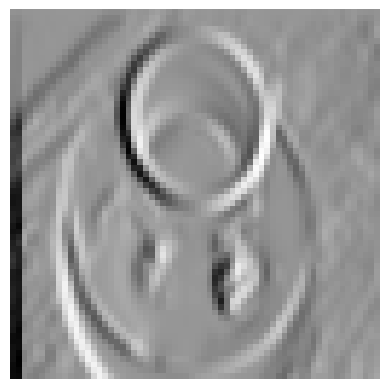

In [ ]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, "constant")

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i, j] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

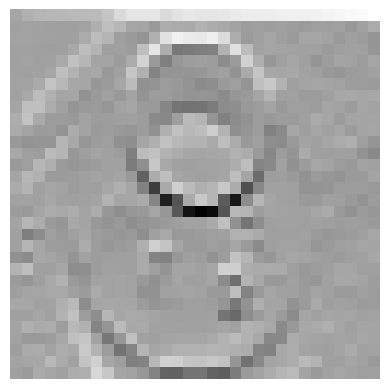

In [ ]:
filter1 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter1[0, 0]
                + im_pad[i - 1, j] * filter1[0, 1]
                + im_pad[i - 1, j + 1] * filter1[0, 2]
                + im_pad[i, j - 1] * filter1[1, 0]
                + im_pad[i, j] * filter1[1, 1]
                + im_pad[i, j + 1] * filter1[1, 2]
                + im_pad[i + 1, j - 1] * filter1[2, 0]
                + im_pad[i + 1, j] * filter1[2, 1]
                + im_pad[i + 1, j + 1] * filter1[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

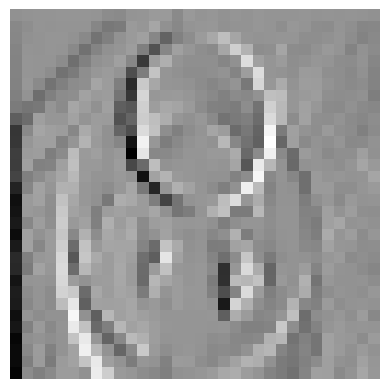

In [ ]:
filter2 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im, 1, "constant")

for i in range(0, im.shape[0], stride):
    for j in range(0, im.shape[1], stride):
        try:
            new_image[int(i / stride), int(j / stride)] = (
                im_pad[i - 1, j - 1] * filter2[0, 0]
                + im_pad[i - 1, j] * filter2[0, 1]
                + im_pad[i - 1, j + 1] * filter2[0, 2]
                + im_pad[i, j - 1] * filter2[1, 0]
                + im_pad[i, j] * filter2[1, 1]
                + im_pad[i, j + 1] * filter2[1, 2]
                + im_pad[i + 1, j - 1] * filter2[2, 0]
                + im_pad[i + 1, j] * filter2[2, 1]
                + im_pad[i + 1, j + 1] * filter2[2, 2]
            )
        except:
            pass

plt.axis("off")
plt.imshow(new_image, cmap="Greys")

In [ ]:
import matplotlib.pyplot as plt


def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()


def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

In [ ]:
import numpy as np
from tensorflow.keras import layers, models,optimizers,utils,datasets

In [ ]:
NUM_CLASSES =10


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
input_layers = layers.Input((32,32,3))
x=layers.Conv2D(filters=32,kernel_size=3,strides=1,padding="same")(input_layers)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

x=layers.Conv2D(filters=32,kernel_size=3,strides=2,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

x=layers.Conv2D(filters=64,kernel_size=3,strides=2,padding="same")(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

x=layers.Flatten()(x)

x=layers.Dense(128)(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)
x=layers.Dropout(rate=0.5)(x)

x=layers.Dense(NUM_CLASSES)(x)
output_layer=layers.Activation("softmax")(x)

model=models.Model(input_layers,output_layer)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,370 (2.12 MB)

 Trainable params: 554,858 (2.12 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
opt=optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test,y_test)
)

Epoch 1/10


I0000 00:00:1728893175.241153      98 service.cc:145] XLA service 0x78245c004000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728893175.241207      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  56/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1999 - loss: 2.6170

I0000 00:00:1728893179.522277      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3750 - loss: 1.8393 - val_accuracy: 0.5034 - val_loss: 1.4265
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5611 - loss: 1.2399 - val_accuracy: 0.5771 - val_loss: 1.2233
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6253 - loss: 1.0660 - val_accuracy: 0.6513 - val_loss: 0.9898
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6588 - loss: 0.9788 - val_accuracy: 0.4281 - val_loss: 1.9451
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6801 - loss: 0.9068 - val_accuracy: 0.6426 - val_loss: 0.9975
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7002 - loss: 0.8575 - val_accuracy: 0.6523 - val_loss: 1.0021
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7136 - loss: 0.8241 - val_accuracy: 0.6647 - val_loss: 0.9717
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7266 - loss: 0.7797 - val_accura

In [ ]:

model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6396 - loss: 1.0528


[1.0588983297348022, 0.6392999887466431]

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds=model.predict(x_test)
preds_single=CLASSES[np.argmax(preds,axis=-1)]
actual_single=CLASSES[np.argmax(y_test,axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


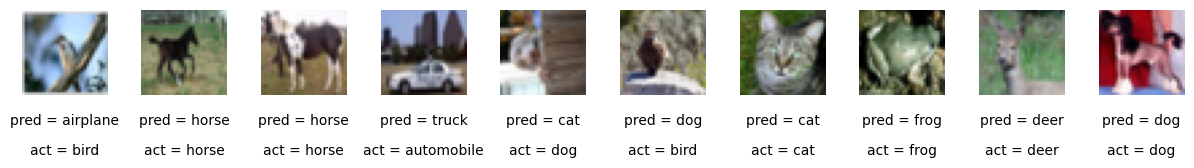

In [ ]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)